Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [398]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

# Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [399]:
airbnbData <- airbnb[, c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')] 
names(airbnbData)

[1] "City"                 "Room.Type"            "Neighbourhood"       
 [4] "Accommodates"         "Bathrooms"            "Bedrooms"            
 [7] "Beds"                 "Price"                "Square.Feet"         
[10] "Guests.Included"      "Extra.People"         "Review.Scores.Rating"
[13] "Latitude"             "Longitude"

In [400]:
summary(airbnbData)

     City            Room.Type         Neighbourhood       Accommodates   
 Length:494954      Length:494954      Length:494954      Min.   : 1.000  
 Class :character   Class :character   Class :character   1st Qu.: 2.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 2.000  
                                                          Mean   : 3.312  
                                                          3rd Qu.: 4.000  
                                                          Max.   :21.000  
                                                          NA's   :63      
   Bathrooms        Bedrooms           Beds            Price      
 Min.   : 0.00   Min.   : 0.000   Min.   : 0.000   Min.   :  0.0  
 1st Qu.: 1.00   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 55.0  
 Median : 1.00   Median : 1.000   Median : 1.000   Median : 90.0  
 Mean   : 1.25   Mean   : 1.378   Mean   : 1.935   Mean   :138.1  
 3rd Qu.: 1.00   3rd Qu.: 2.000   3rd Qu.: 2.000   3rd Qu.:150.0 

In [401]:
library (dplyr)
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

## Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
## Podemos eliminar las siguientes columnas que ya no son necesarias:
#### "Room.Type",'City'

## Llama a nuevo dataframe df_madrid.

In [402]:
df_madrid <- airbnbData %>%
    filter(Room.Type == "Entire home/apt")

In [403]:
# df_madrid <- df_madrid %>%  filter(!is.na(Neighbourhood))
df_madrid <- df_madrid %>%  filter(City == "Madrid")

In [404]:
#madrid_data<-df_madrid[ , 3:14]
#df_madrid <- madrid_data
summary(df_madrid)

     City            Room.Type         Neighbourhood       Accommodates   
 Length:7903        Length:7903        Length:7903        Min.   : 1.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 4.000  
                                                          Mean   : 4.051  
                                                          3rd Qu.: 5.000  
                                                          Max.   :16.000  
                                                                          
   Bathrooms        Bedrooms           Beds            Price      
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   : 10.0  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 55.0  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 71.0  
 Mean   :1.241   Mean   : 1.463   Mean   : 2.374   Mean   : 87.3  
 3rd Qu.:1.000   3rd Qu.: 2.000   3rd Qu.: 3.000   3rd Qu.: 99.0 

## Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [406]:
df_madrid$Square.Meters <- df_madrid$Square.Feet * 0.092903

In [407]:
summary(df_madrid)

     City            Room.Type         Neighbourhood       Accommodates   
 Length:7903        Length:7903        Length:7903        Min.   : 1.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 4.000  
                                                          Mean   : 4.051  
                                                          3rd Qu.: 5.000  
                                                          Max.   :16.000  
                                                                          
   Bathrooms        Bedrooms           Beds            Price      
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   : 10.0  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 55.0  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 71.0  
 Mean   :1.241   Mean   : 1.463   Mean   : 2.374   Mean   : 87.3  
 3rd Qu.:1.000   3rd Qu.: 2.000   3rd Qu.: 3.000   3rd Qu.: 99.0 

## ¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [408]:
dt <- summary(df_madrid$Square.Meters)
print(dt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   27.04   37.30   60.02  480.03    7546 


In [409]:
barriosNan <- df_madrid %>%
    filter(is.na(Square.Meters)) %>%
    count(City, sort = TRUE)

cat("El porcentaje de apartamentos con valore NAN es el ", barriosNan$n / length(df_madrid$Neighbourhood) * 100, " %", "\n")

El porcentaje de apartamentos con valore NAN es el  95.48273  % 


### De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
### ¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [410]:
b0 <- df_madrid %>%
    filter(!is.na(Square.Meters)) %>%
    count(City, sort = TRUE)

In [411]:
b1 <- df_madrid %>%
    filter(Square.Meters == 0) %>%
        count(City, sort = TRUE)
cat("El porcentaje de apartamentos con 0 metros cuadrados es el ", b01$n/b0$n*100, " %", "\n")

El porcentaje de apartamentos con 0 metros cuadrados es el  36.41457  % 


# Reemplazar todos los 0m^2 por NA 

In [412]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0] <- NA

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

In [414]:
summary(df_madrid)

     City            Room.Type         Neighbourhood       Accommodates   
 Length:7903        Length:7903        Length:7903        Min.   : 1.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 4.000  
                                                          Mean   : 4.051  
                                                          3rd Qu.: 5.000  
                                                          Max.   :16.000  
                                                                          
   Bathrooms        Bedrooms           Beds            Price      
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   : 10.0  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 55.0  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 71.0  
 Mean   :1.241   Mean   : 1.463   Mean   : 2.374   Mean   : 87.3  
 3rd Qu.:1.000   3rd Qu.: 2.000   3rd Qu.: 3.000   3rd Qu.: 99.0 

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Warning message:
"Removed 7676 rows containing non-finite values (stat_bin)."


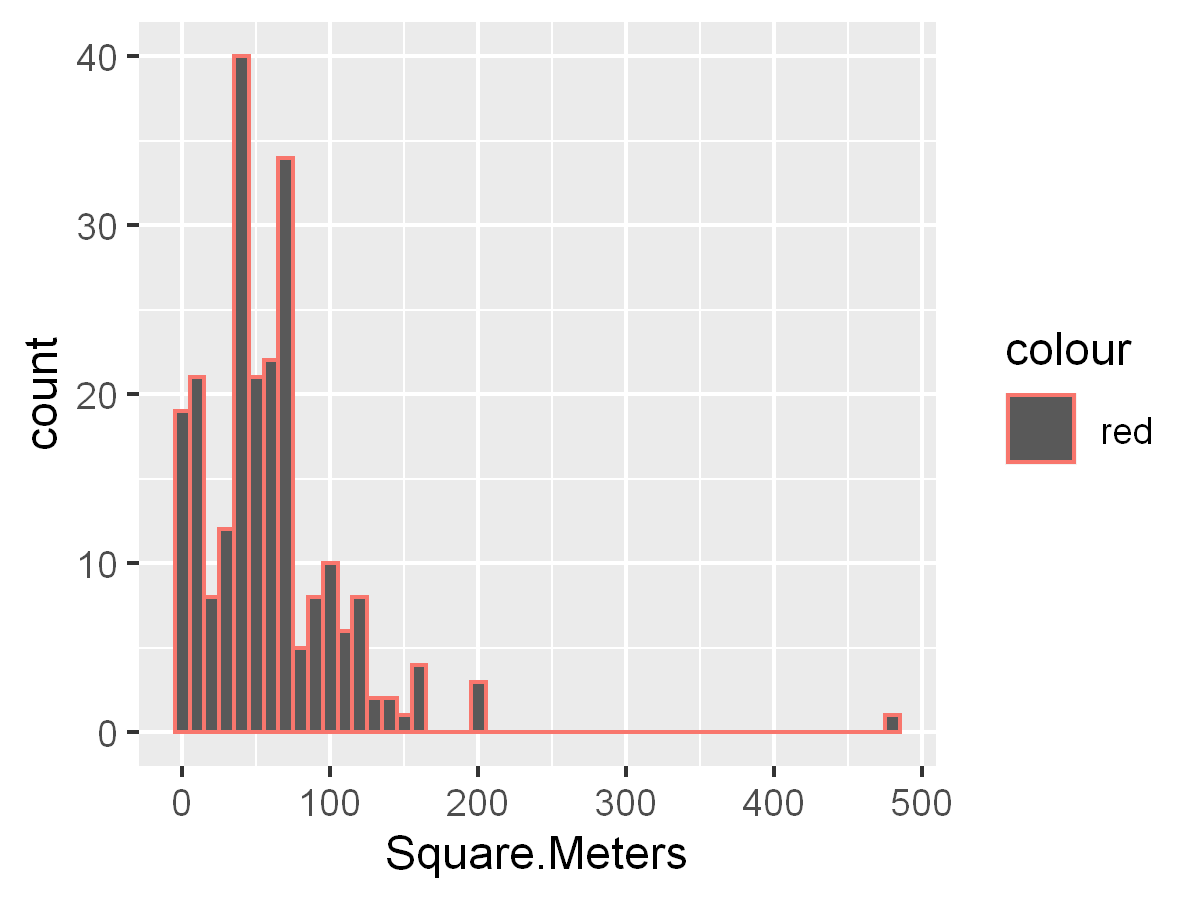

In [415]:
options(repr.plot.height=3,repr.plot.width=4)
ggplot(df_madrid, aes(Square.Meters, colour="red"))+geom_histogram(binwidth=10)

# Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [416]:
df_madrid$Square.Meters[df_madrid$Square.Meters < 20] <- NA

In [417]:
summary(df_madrid)

     City            Room.Type         Neighbourhood       Accommodates   
 Length:7903        Length:7903        Length:7903        Min.   : 1.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 4.000  
                                                          Mean   : 4.051  
                                                          3rd Qu.: 5.000  
                                                          Max.   :16.000  
                                                                          
   Bathrooms        Bedrooms           Beds            Price      
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   : 10.0  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 55.0  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 71.0  
 Mean   :1.241   Mean   : 1.463   Mean   : 2.374   Mean   : 87.3  
 3rd Qu.:1.000   3rd Qu.: 2.000   3rd Qu.: 3.000   3rd Qu.: 99.0 

# Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [419]:
dfMadridBackup <- df_madrid
summary(dfMadridBackup)

     City            Room.Type         Neighbourhood       Accommodates   
 Length:7903        Length:7903        Length:7903        Min.   : 1.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 4.000  
                                                          Mean   : 4.051  
                                                          3rd Qu.: 5.000  
                                                          Max.   :16.000  
                                                                          
   Bathrooms        Bedrooms           Beds            Price      
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   : 10.0  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 55.0  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 71.0  
 Mean   :1.241   Mean   : 1.463   Mean   : 2.374   Mean   : 87.3  
 3rd Qu.:1.000   3rd Qu.: 2.000   3rd Qu.: 3.000   3rd Qu.: 99.0 

In [420]:
# Salvamos el df_madrid antes de eliminar los datos
dfNew <- na.omit(df_madrid)
df_madrid <- dfNew
summary(df_madrid)

     City            Room.Type         Neighbourhood       Accommodates   
 Length:173         Length:173         Length:173         Min.   : 2.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 4.000  
                                                          Mean   : 4.538  
                                                          3rd Qu.: 6.000  
                                                          Max.   :16.000  
   Bathrooms        Bedrooms         Beds            Price       
 Min.   :1.000   Min.   :0.00   Min.   : 1.000   Min.   : 30.00  
 1st Qu.:1.000   1st Qu.:1.00   1st Qu.: 1.000   1st Qu.: 60.00  
 Median :1.000   Median :1.00   Median : 2.000   Median : 75.00  
 Mean   :1.292   Mean   :1.59   Mean   : 2.723   Mean   : 93.03  
 3rd Qu.:1.000   3rd Qu.:2.00   3rd Qu.: 4.000   3rd Qu.: 99.00  
 Max.   :5.000   Max.   :5.00   Max.   :13.000   Max.   :500.00  
  Square.Feet

## El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

## Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

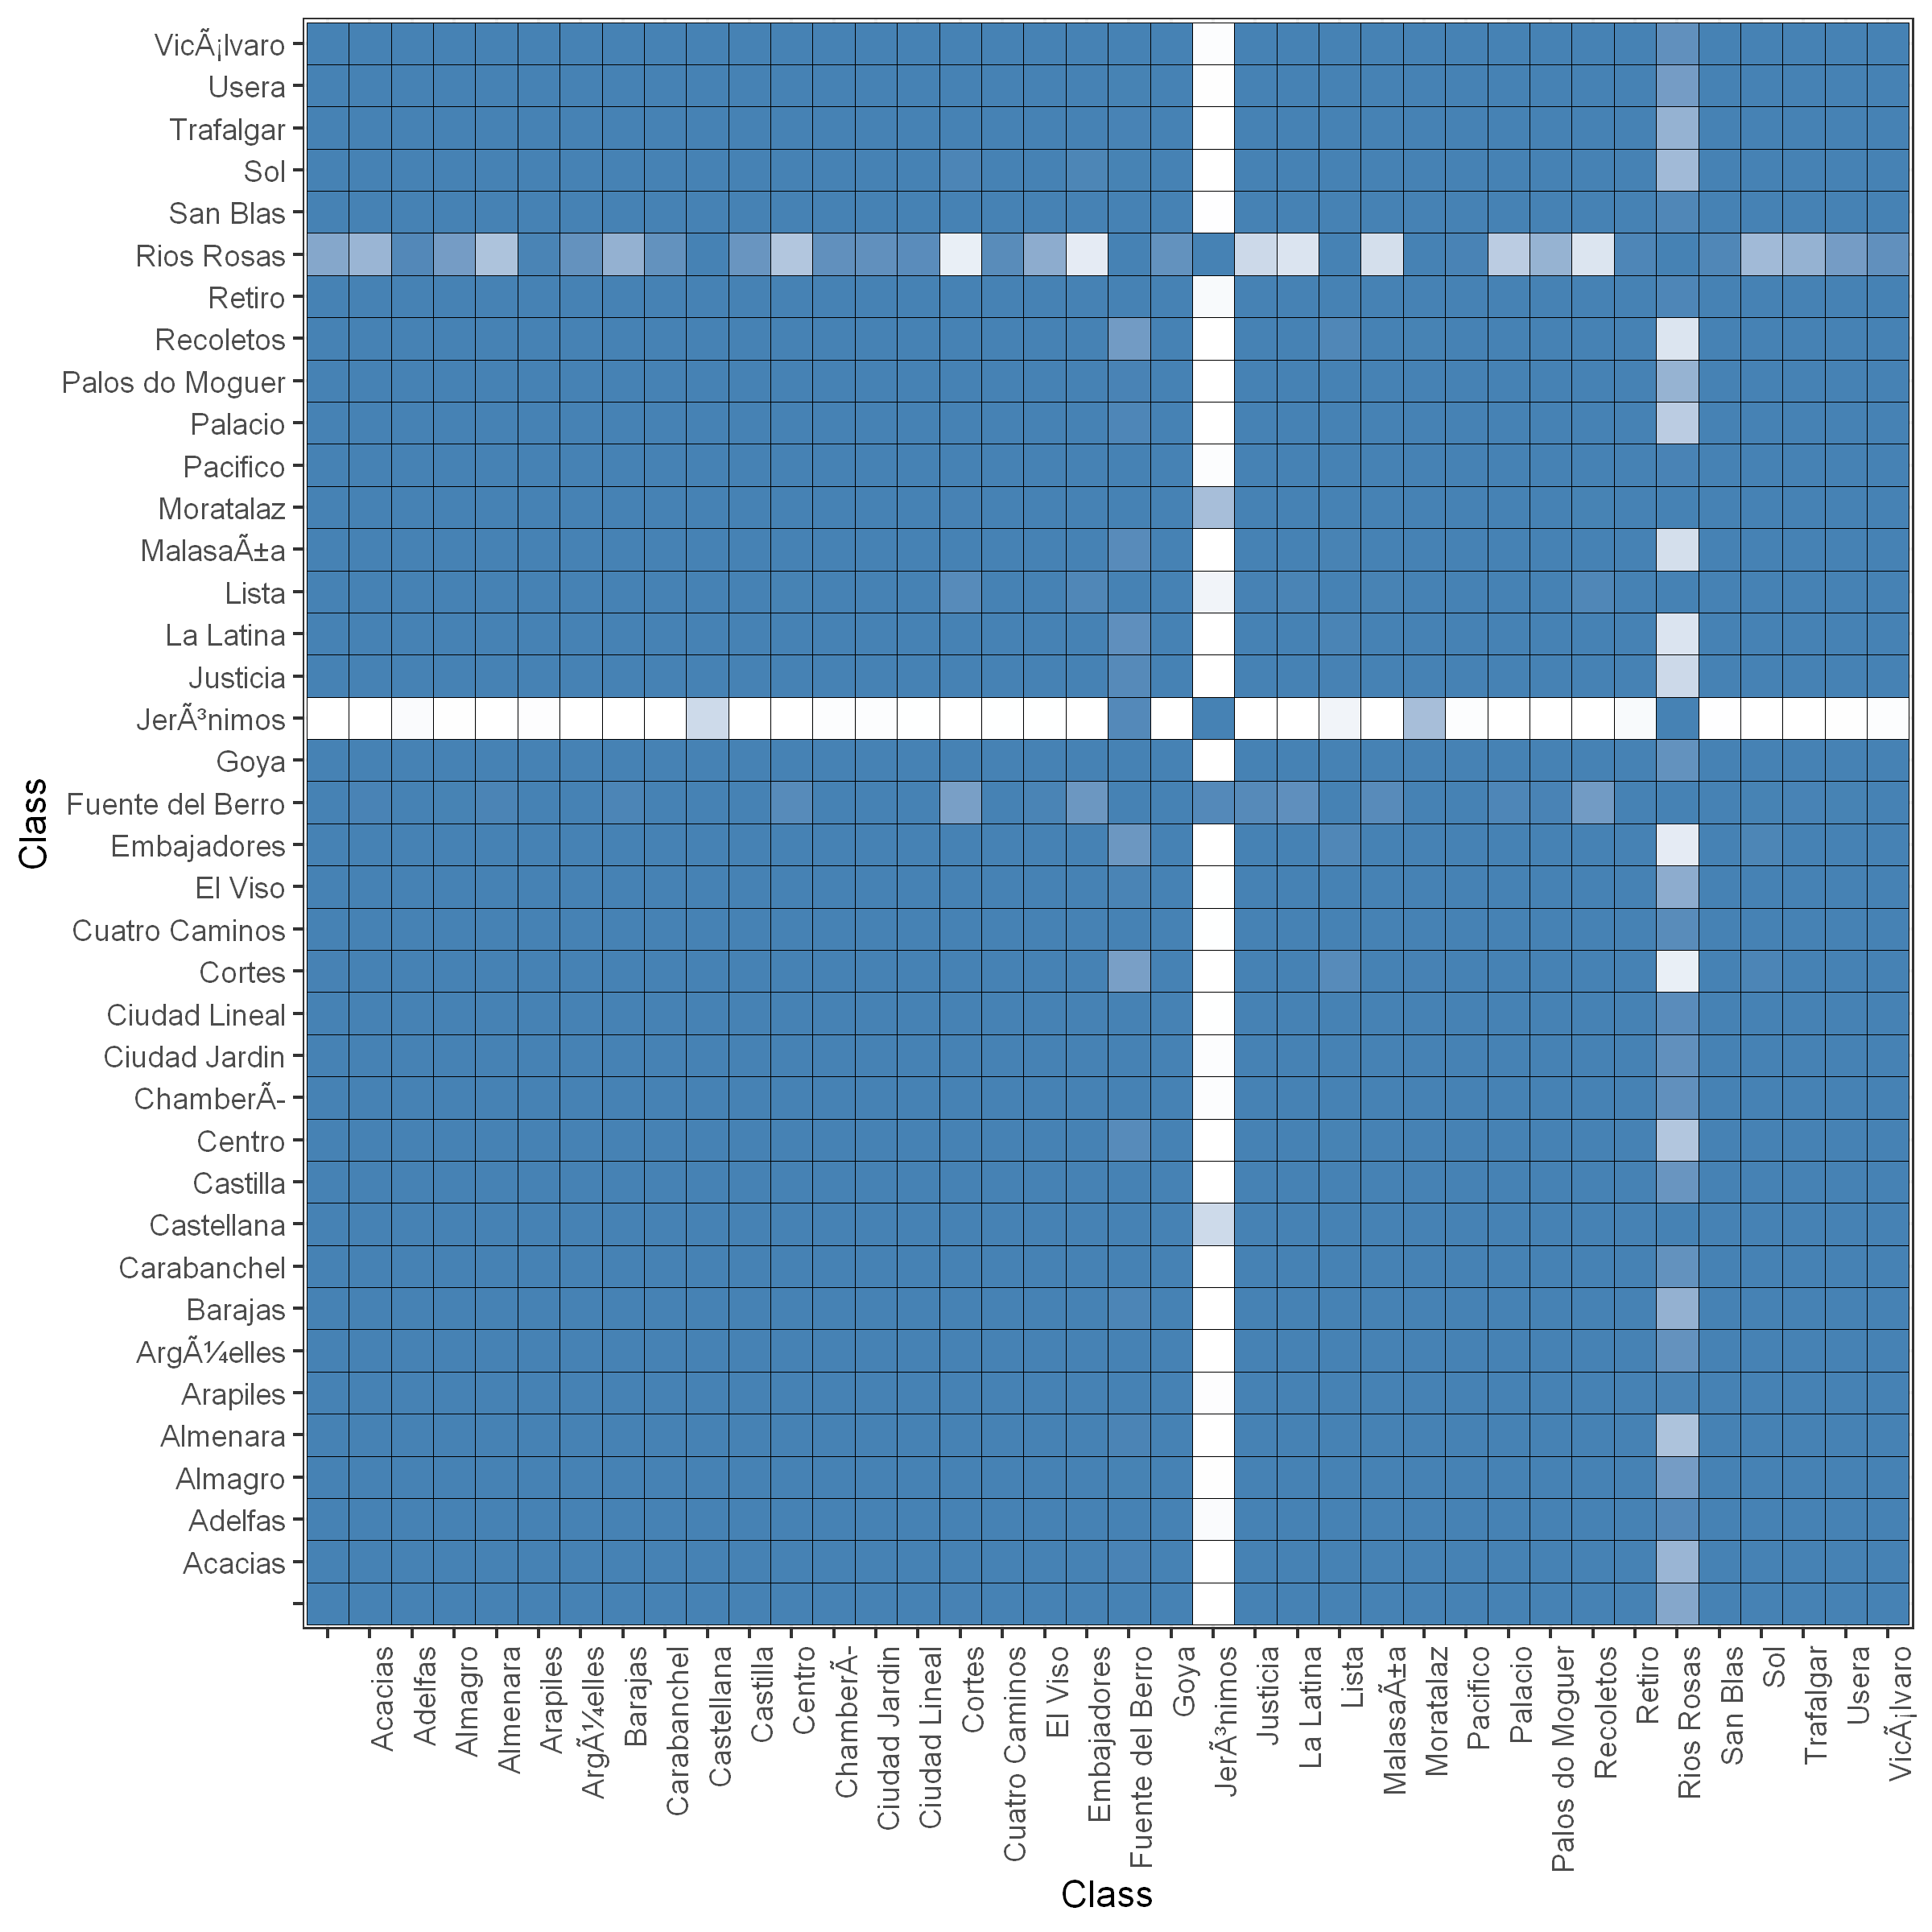

In [421]:
options(repr.plot.height=8,repr.plot.width=8)

tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

In [422]:
resm

Acacias Adelfas Almagro Almenara Arapiles ArgÃ¼elles
                 1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Acacias          1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Adelfas          1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Almagro          1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Almenara         1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Arapiles         1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
ArgÃ¼elles       1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Barajas          1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Carabanchel      1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Castellana       1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Castilla         1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Centro           1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
ChamberÃ­        1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Ciudad Jardin    1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Ciudad Lineal    1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Cortes           0.9970 1.0000  1.0000  1.0000  1.0000   0.9998   1.0000    
Cuatro Caminos   1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
El Viso          1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Embajadores      0.9992 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Fuente del Berro 0.9986 0.9894  0.9999  0.9956  0.9805   1.0000   0.9998    
Goya             1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
JerÃ³nimos       0.0000 0.0001  0.0291  0.0068  0.0000   0.0126   0.0006    
Justicia         1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
La Latina        1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Lista            1.0000 1.0000  1.0000  1.0000  0.9998   1.0000   1.0000    
MalasaÃ±a        1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Moratalaz        1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Pacifico         1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Palacio          1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Palos do Moguer  1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Recoletos        0.9997 1.0000  1.0000  1.0000  1.0000   0.9996   1.0000    
Retiro           1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Rios Rosas       0.6921 0.5719  0.9449  0.7760  0.4655   0.9840   0.8596    
San Blas         1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Sol              1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Trafalgar        1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
Usera            1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
VicÃ¡lvaro       1.0000 1.0000  1.0000  1.0000  1.0000   1.0000   1.0000    
                 Barajas Carabanchel Castellana ... Palacio Palos do Moguer
                 1.0000  1.0000      1.0000     ... 1.0000  1.0000         
Acacias          1.0000  1.0000      1.0000     ... 1.0000  1.0000         
Adelfas          1.0000  1.0000      1.0000     ... 1.0000  1.0000         
Almagro          1.0000  1.0000      1.0000     ... 1.0000  1.0000         
Almenara         1.0000  1.0000      1.0000     ... 1.0000  1.0000         
Arapiles         1.0000  1.0000      1.0000     ... 1.0000  1.0000         
ArgÃ¼elles       1.0000  1.0000      1.0000     ... 1.0000  1.0000         
Barajas          1.0000  1.0000      1.0000     ... 1.0000  1.0000         
Carabanchel      1.0000  1.0000      1.0000     ... 1.0000  1.0000         
Castellana       1.0000  1.0000      1.0000     ... 1.0000  1.0000         
Castilla         1.0000  1.0000      1.0000     ... 1.0000  1.0000         
Centro           1.0000  1.0000      1.0000     ... 1.0000  1.0000         
ChamberÃ­        1.0000  1.0000  

# Usando como variable de distancia: 1-resm
## Dibuja un dendrograma de los diferentes barrios.


In [423]:
tail(resm)

Acacias Adelfas Almagro Almenara Arapiles ArgÃ¼elles Barajas
Rios Rosas 0.6921 0.5719  0.9449  0.776   0.4655   0.984    0.8596     0.605  
San Blas   1.0000 1.0000  1.0000  1.000   1.0000   1.000    1.0000     1.000  
Sol        1.0000 1.0000  1.0000  1.000   1.0000   1.000    1.0000     1.000  
Trafalgar  1.0000 1.0000  1.0000  1.000   1.0000   1.000    1.0000     1.000  
Usera      1.0000 1.0000  1.0000  1.000   1.0000   1.000    1.0000     1.000  
VicÃ¡lvaro 1.0000 1.0000  1.0000  1.000   1.0000   1.000    1.0000     1.000  
           Carabanchel Castellana ... Palacio Palos do Moguer Recoletos Retiro
Rios Rosas 0.8653      0.9999     ... 0.3901  0.5951          0.2005    0.9661
San Blas   1.0000      1.0000     ... 1.0000  1.0000          1.0000    1.0000
Sol        1.0000      1.0000     ... 1.0000  1.0000          0.9997    1.0000
Trafalgar  1.0000      1.0000     ... 1.0000  1.0000          1.0000    1.0000
Usera      1.0000      1.0000     ... 1.0000  1.0000          1.0000    1.0000
VicÃ¡lvaro 1.0000      1.0000     ... 1.0000  1.0000          1.0000    1.0000
           Rios Rosas San Blas Sol    Trafalgar Usera VicÃ¡lvaro
Rios Rosas 1.0000     0.9587   0.5336 0.6012    0.776 0.8783    
San Blas   0.9587     1.0000   1.0000 1.0000    1.000 1.0000    
Sol        0.5336     1.0000   1.0000 1.0000    1.000 1.0000    
Trafalgar  0.6012     1.0000   1.0000 1.0000    1.000 1.0000    
Usera      0.7760     1.0000   1.0000 1.0000    1.000 1.0000    
VicÃ¡lvaro 0.8783     1.0000   1.0000 1.0000    1.000 1.0000

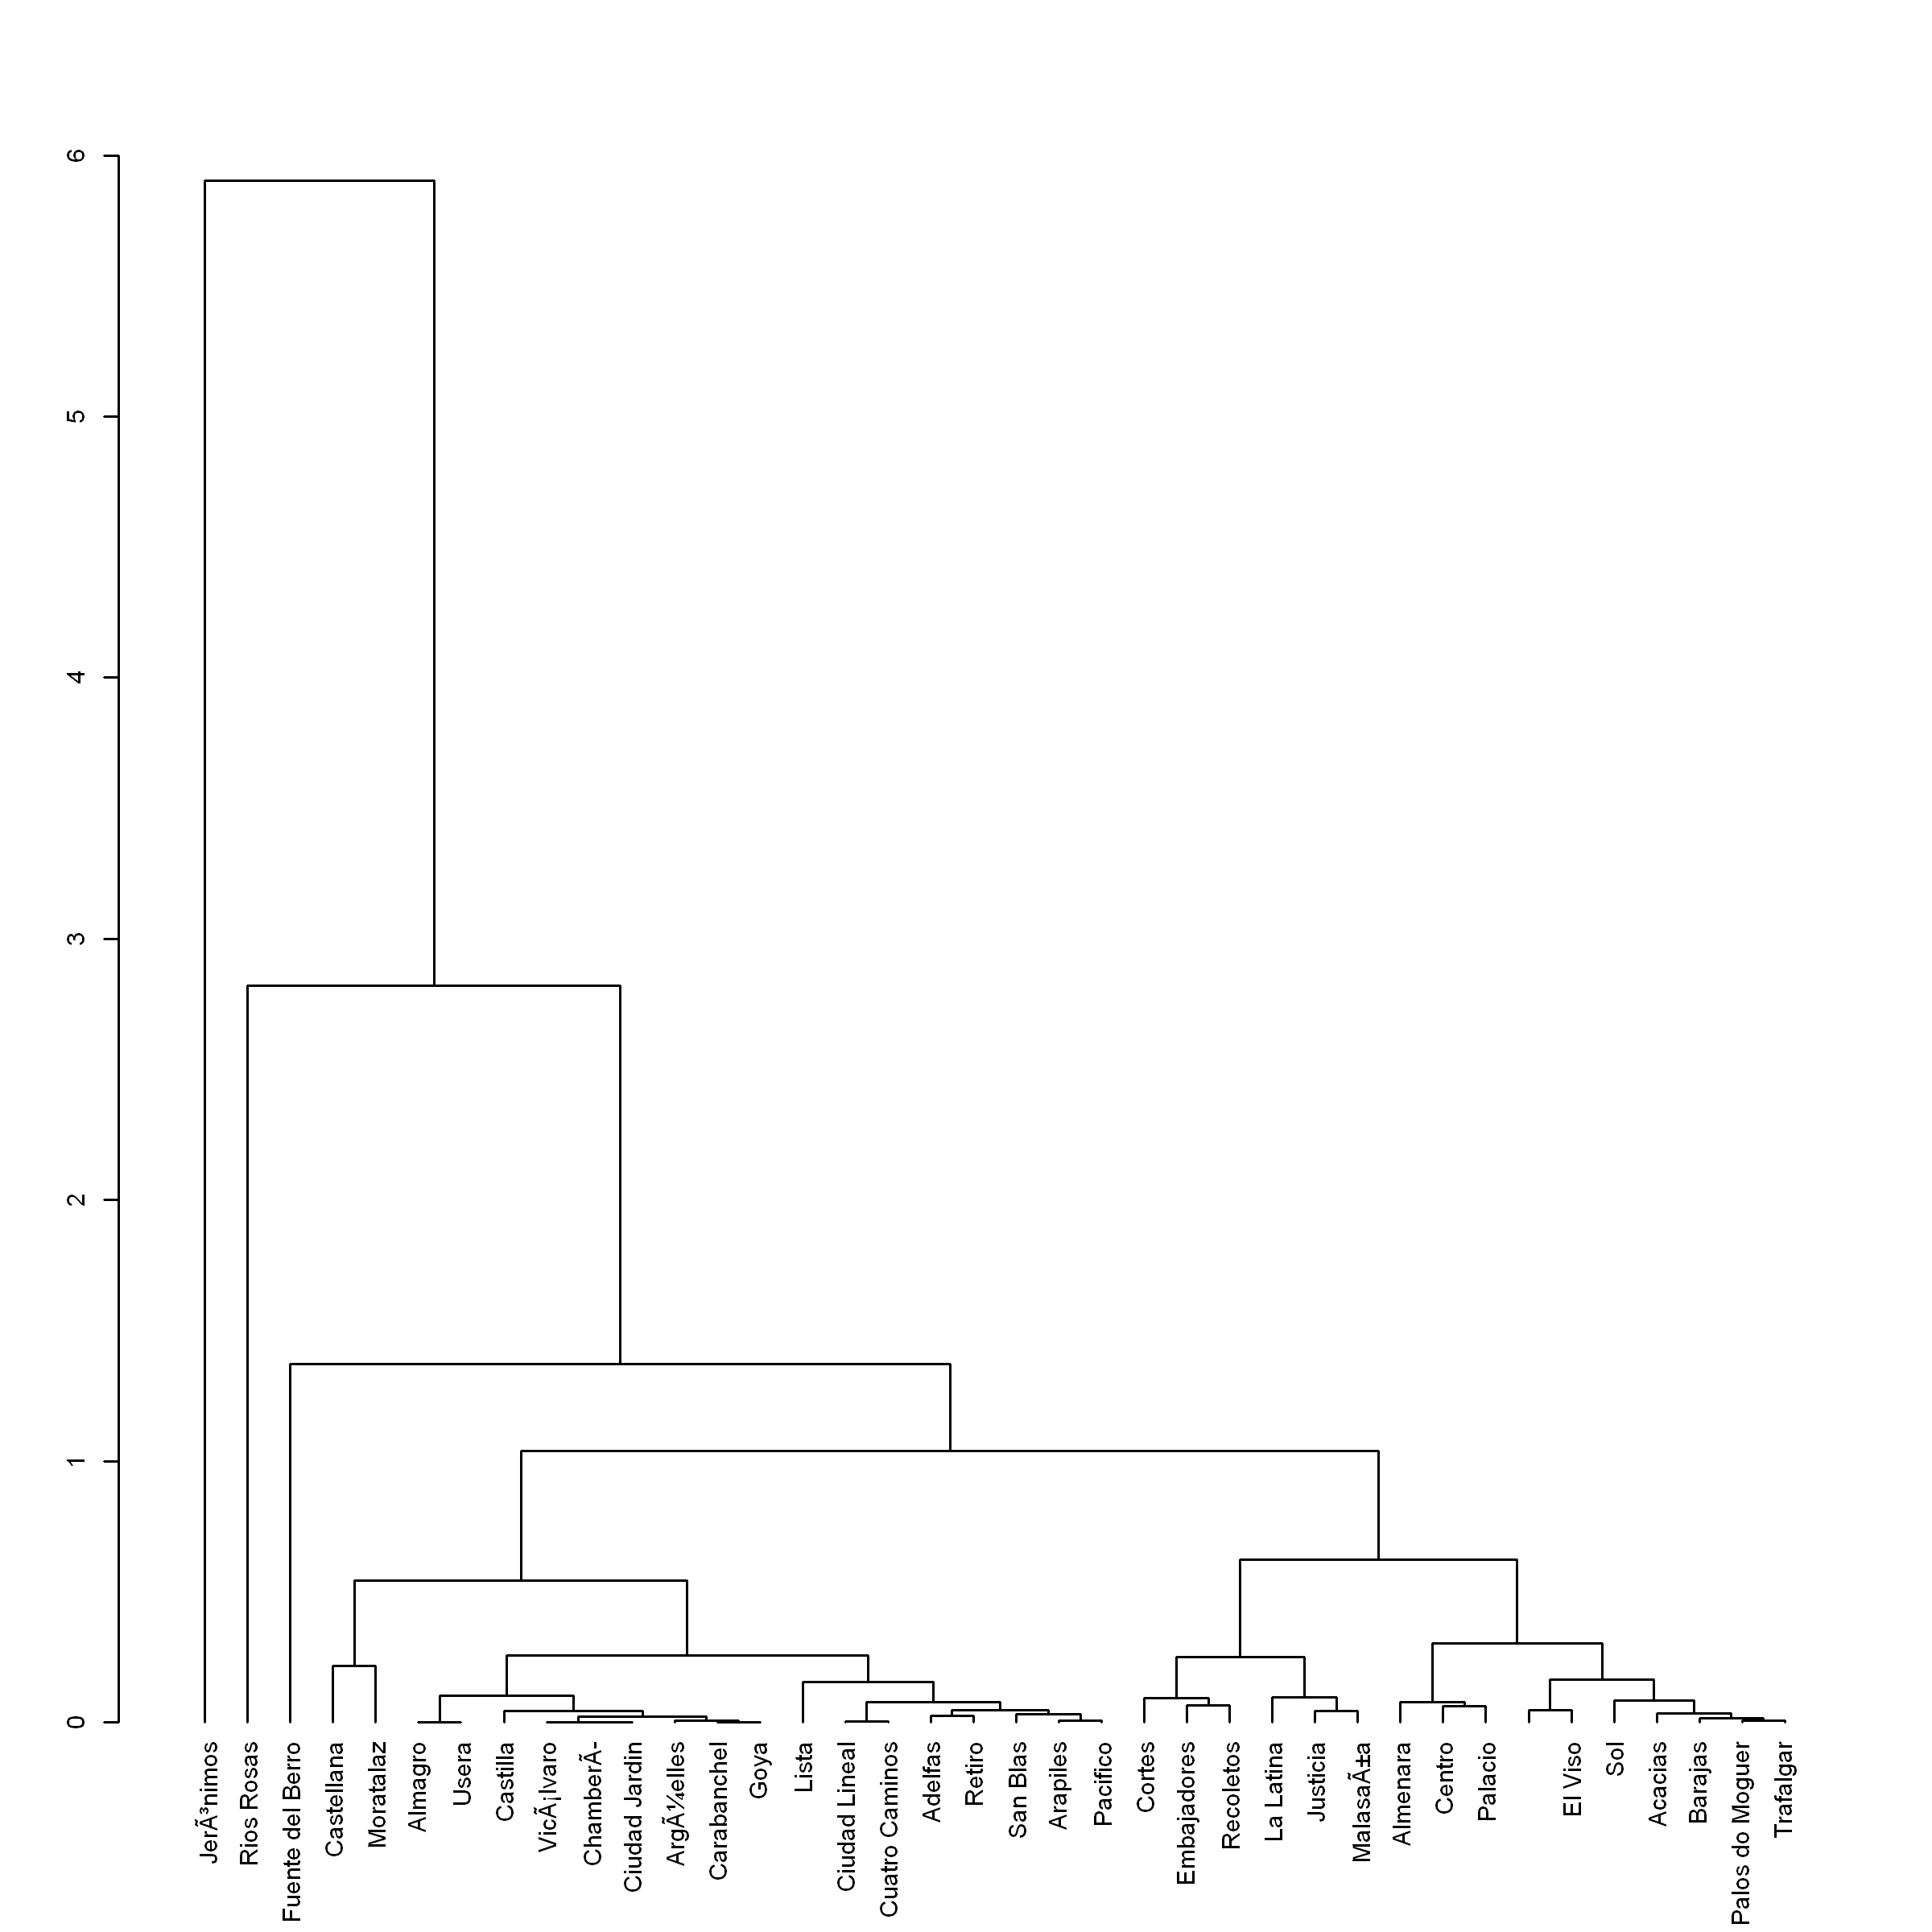

In [425]:
#d <- dist(as.matrix(madrid_data),method = "euclidean")
d <- dist(as.matrix(1-resm),method = "euclidean")
hc <- hclust(d, method="complete")
hcd <- as.dendrogram(hc)
par(cex=0.6)
plot(hcd)

In [426]:
# cutree_1h.dendrogram
# head(hc)

In [427]:
library(dendextend)
#labels(hcd)<-madrid_labels$Neighbourhood[labels(hcd)]
#labels(hcd)<-madrid_labels$Neighbourhood[labels(hcd)]

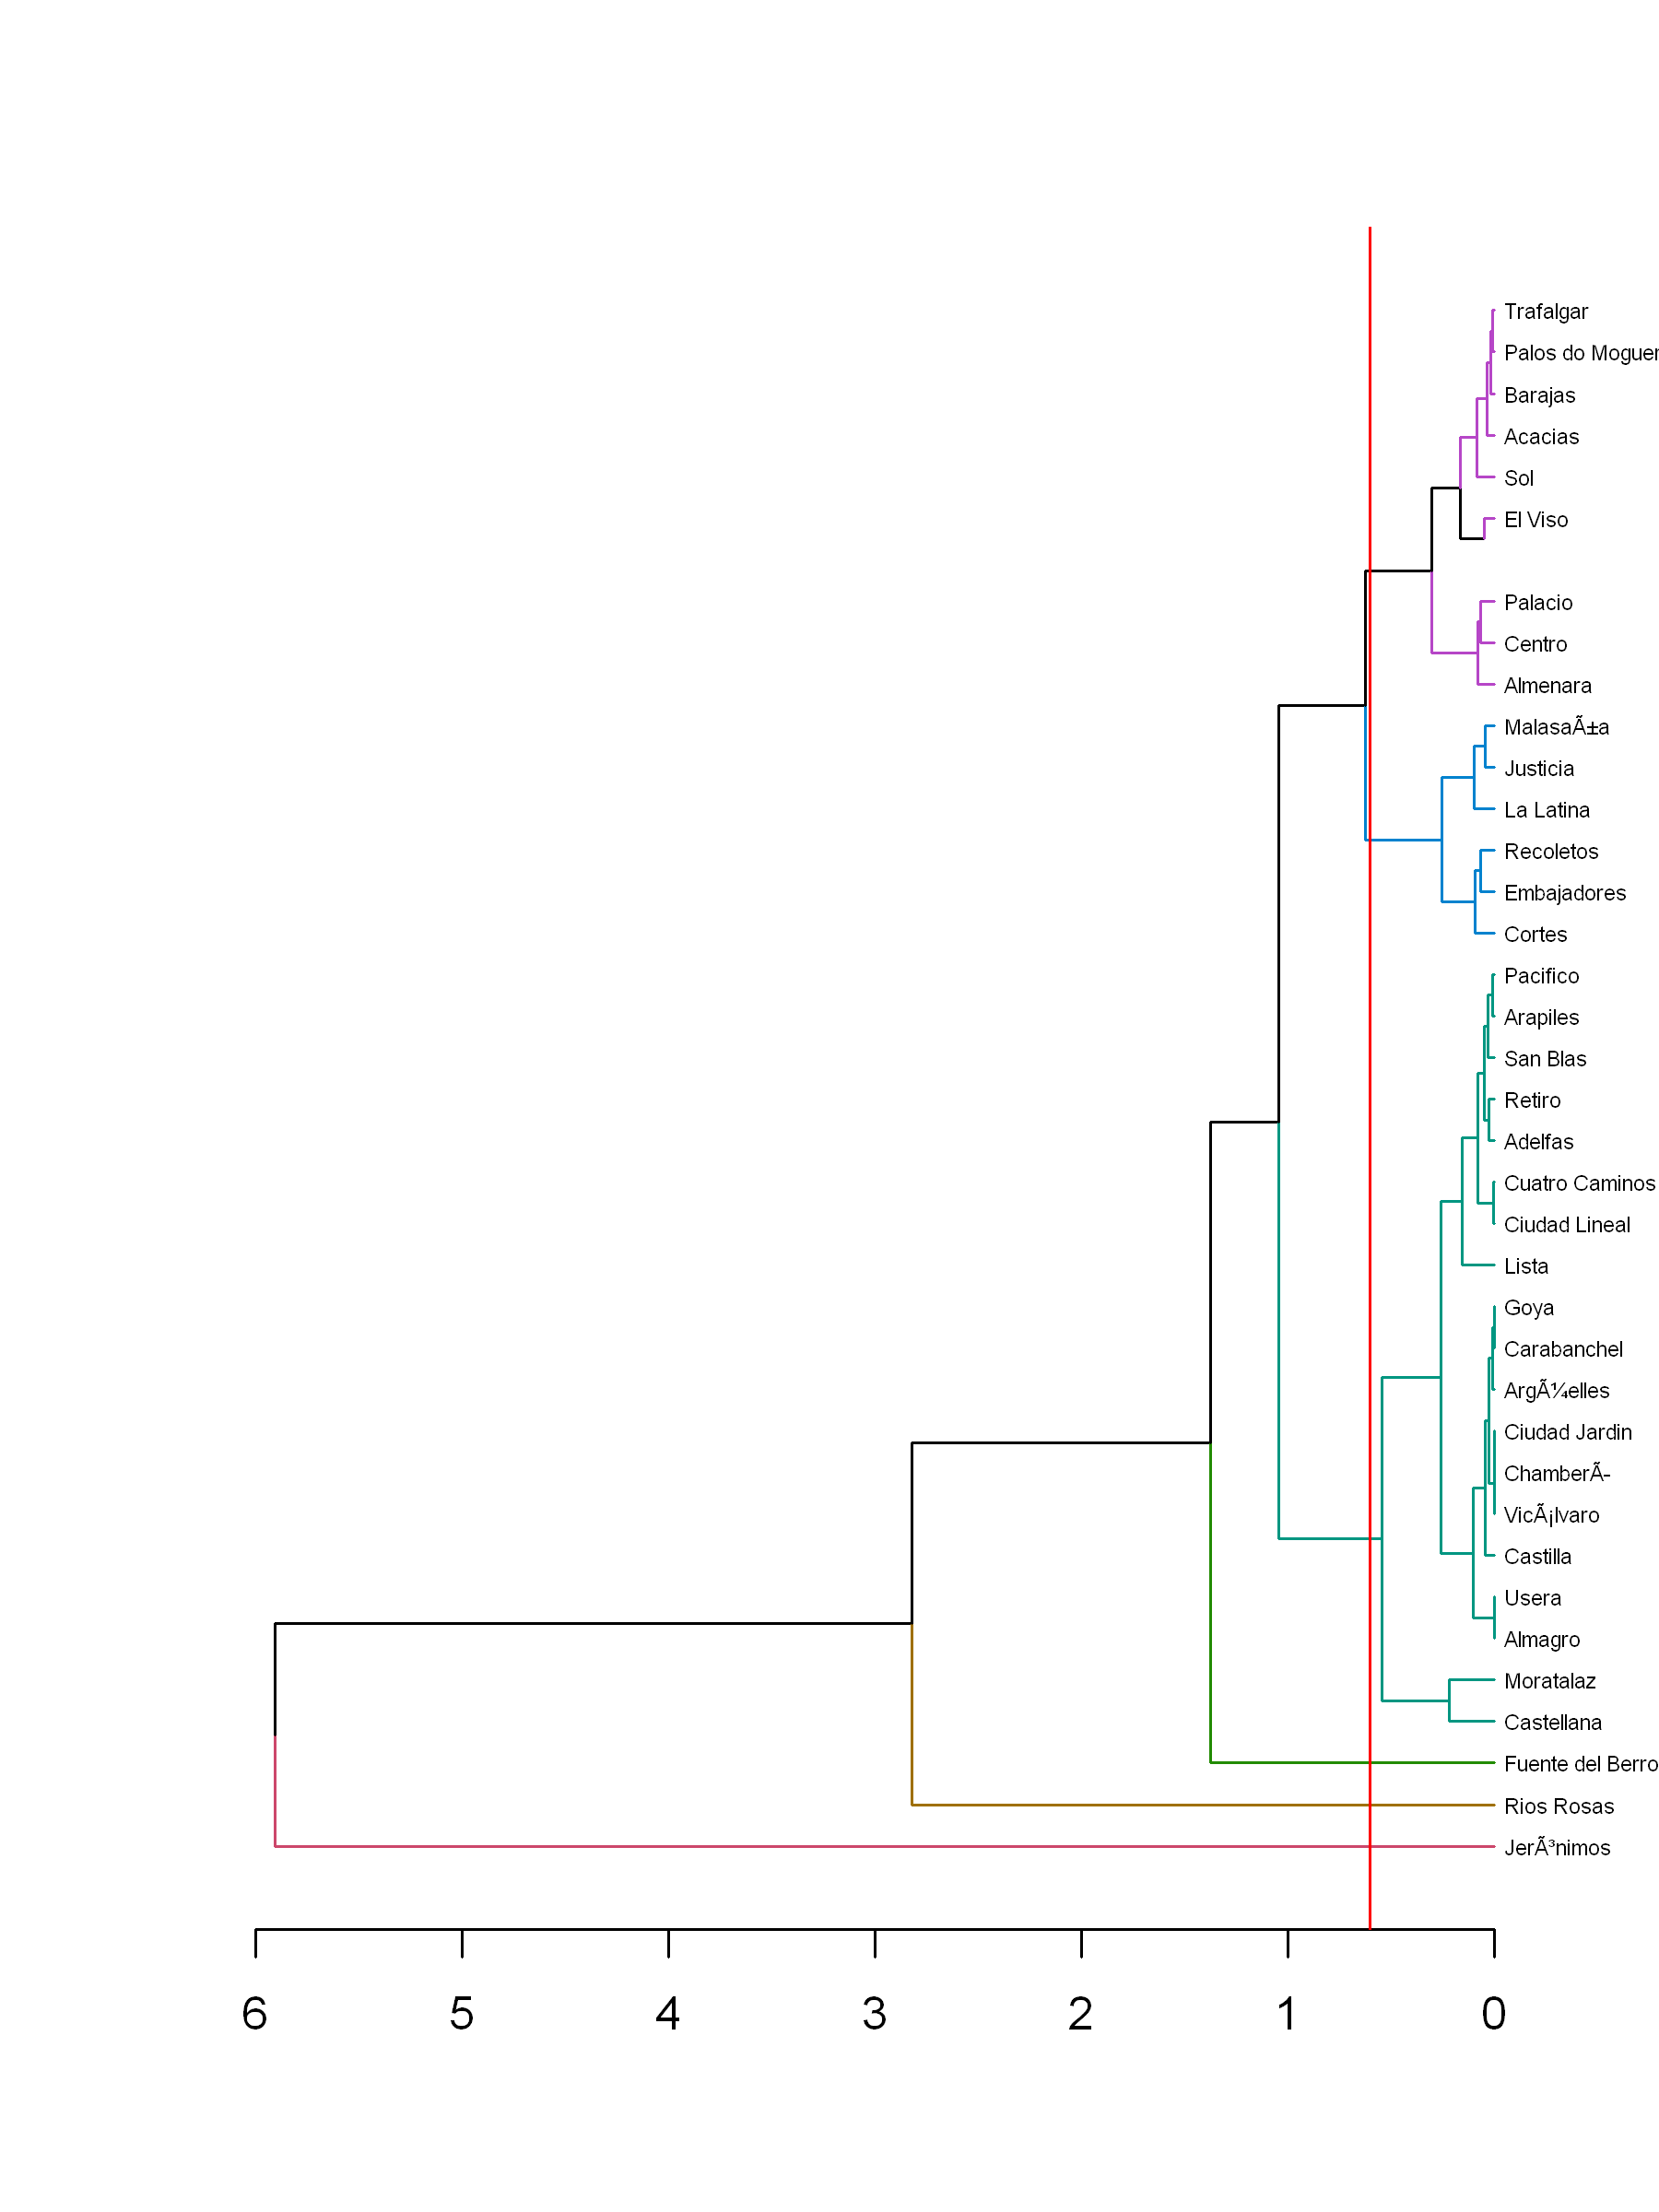

In [428]:
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)
hcd<-set(hcd,"labels_cex", 0.45) 
max_dist <- 0.6
plot(color_branches(hcd,h=max_dist),horiz=TRUE,cex=0)
abline(v=max_dist,col="red")

# ¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

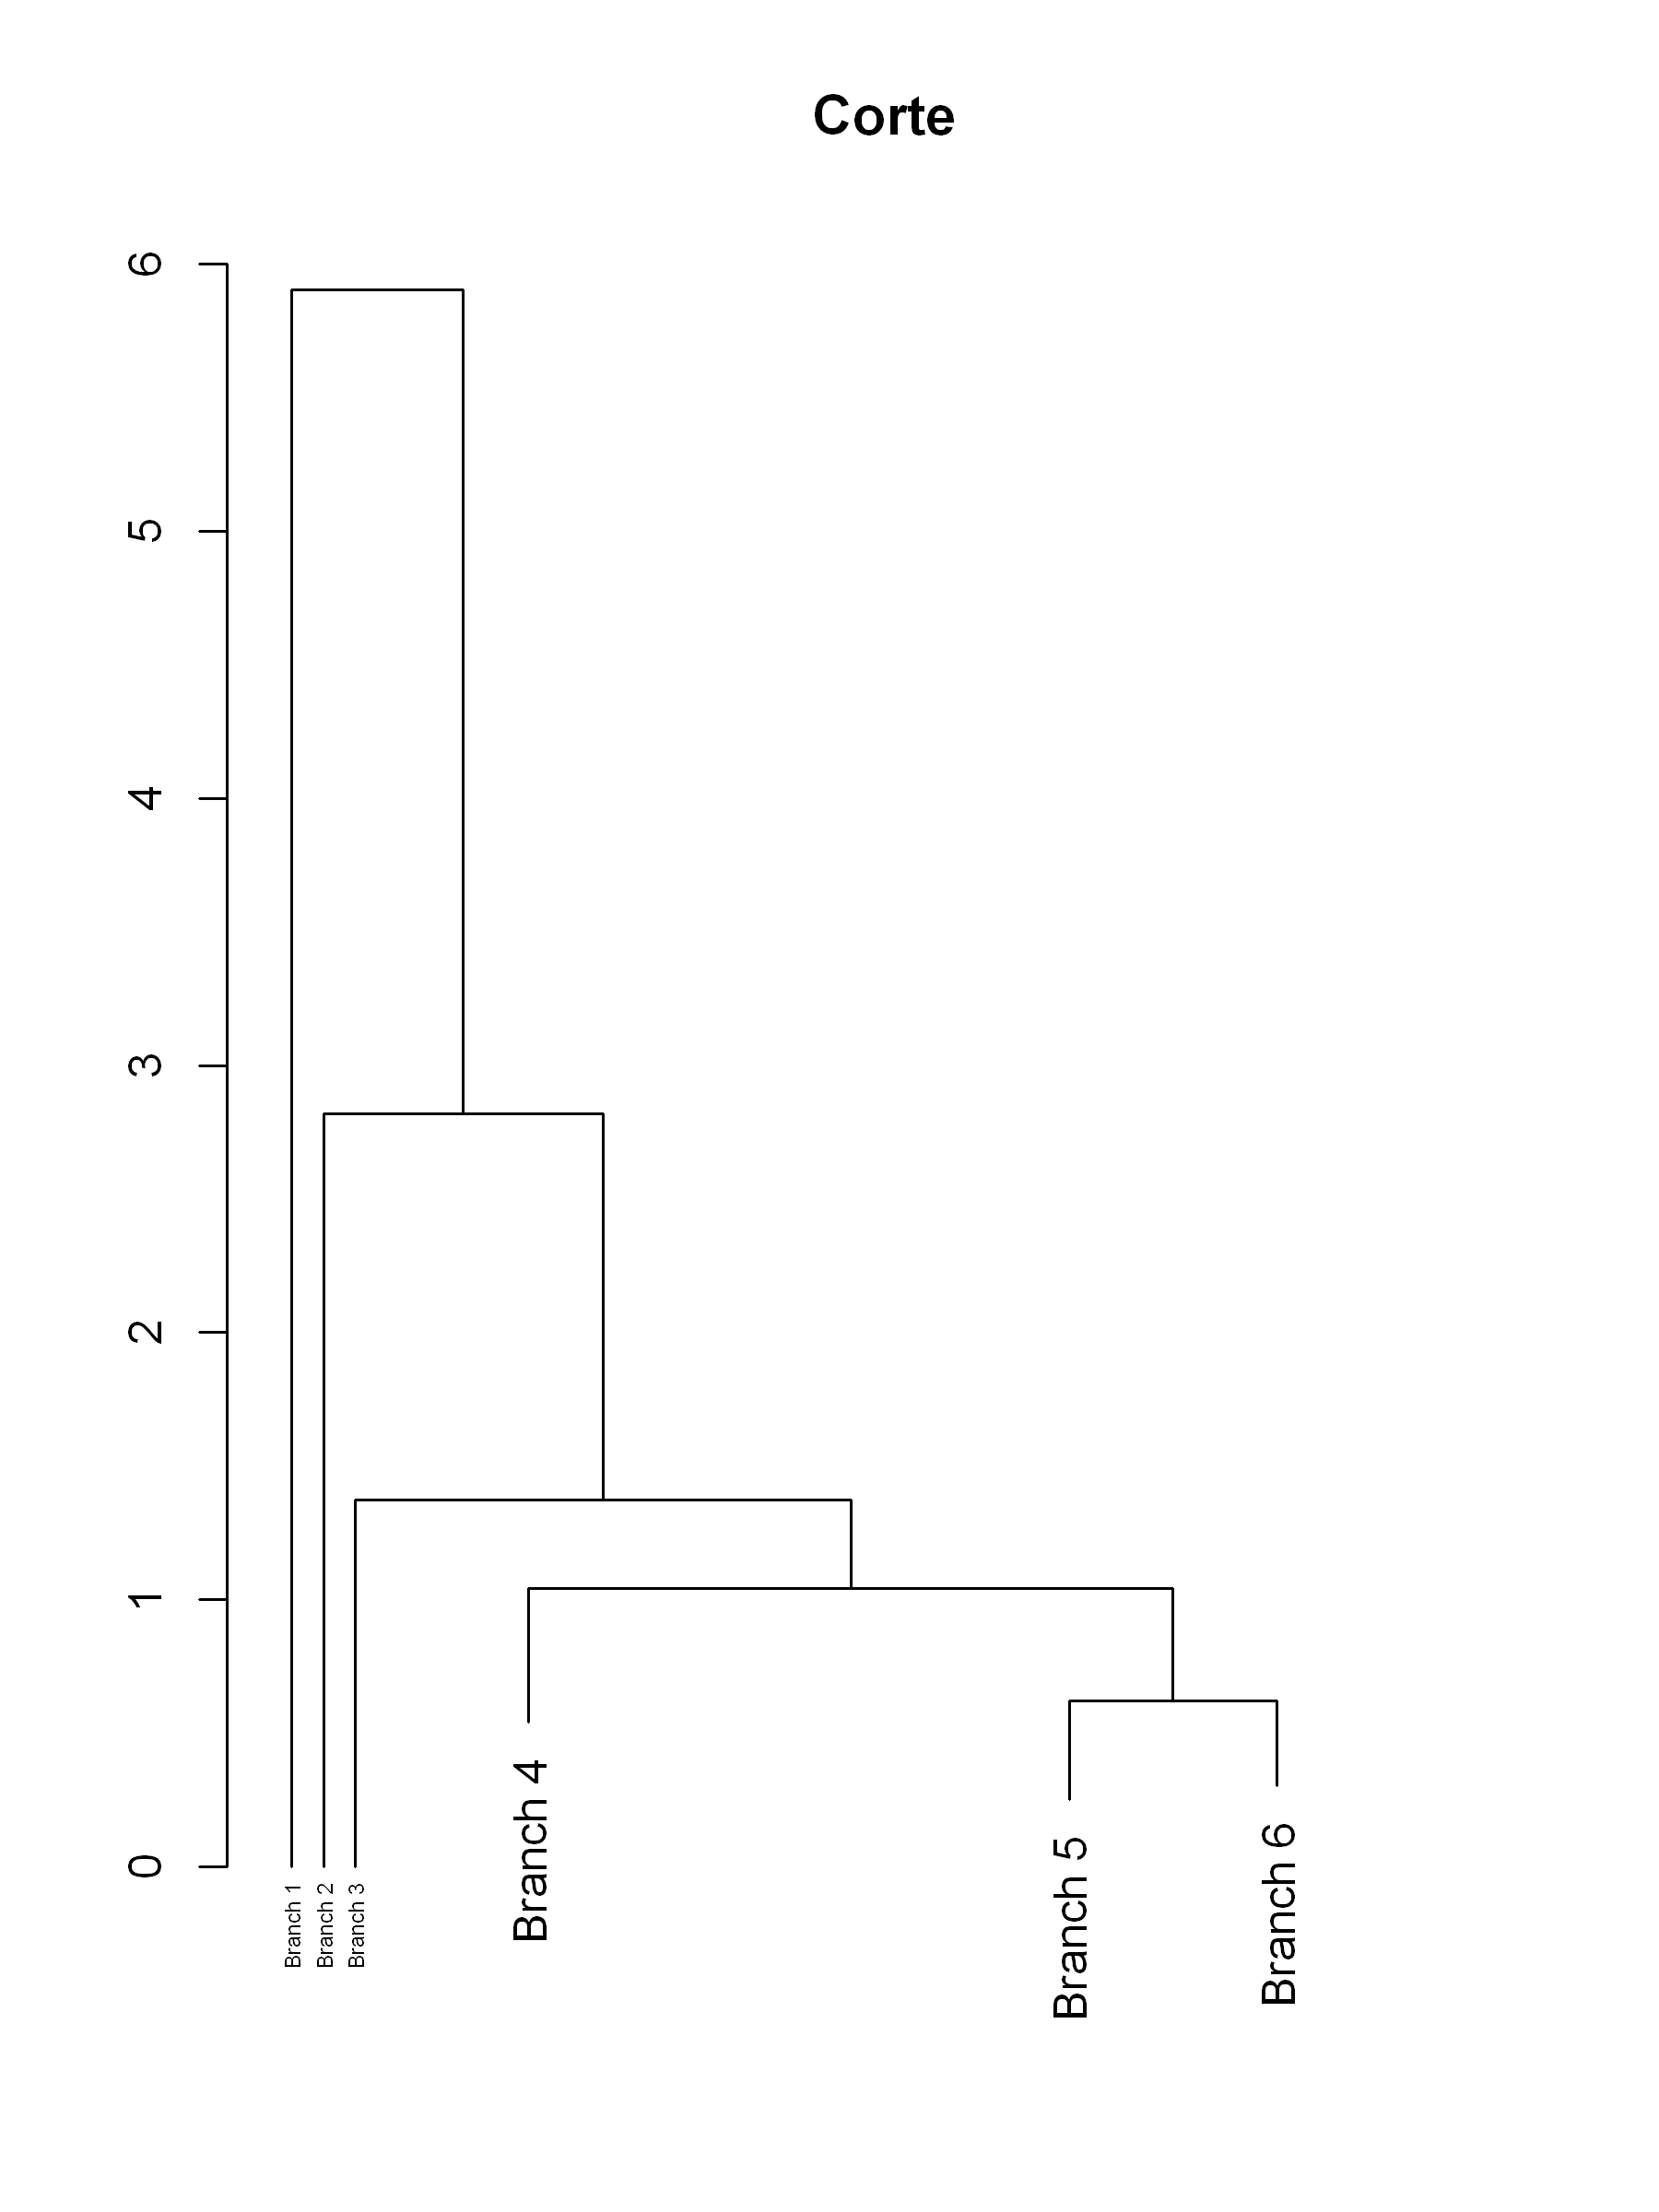

In [429]:
plot(cut(hcd, h = 0.6)$upper, main = "Corte", cex=1)

In [430]:
length(cutree(hc, h=2))

[1] 38

### El punto de corte seria 0.6
### Segun el Summary aparacen 3 Clusters muy definidos


# Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [431]:
# cutree_1h.dendrogram(hcd,h=8.5)
cl <- cutree_1h.dendrogram(hcd,h=0.6)

In [432]:
 length(factor(cl))

[1] 38

In [433]:
# Agrupamos los barrios para poder asignar los id del DenDrogram
soloBarriosMadrid <- df_madrid %>% 
            group_by(Neighbourhood)%>%
            count(Neighbourhood)

In [436]:
cl <- cutree_1h.dendrogram(hcd,h=0.6)
soloBarriosMadrid$neighb_id = factor(cl)
soloBarriosMadrid
dfMadridConClusterId <- subset(merge(df_madrid, soloBarriosMadrid), select = -c(n))

Neighbourhood    n  neighb_id
1                    8 1        
2  Acacias           3 1        
3  Adelfas           1 3        
4  Almagro           1 3        
5  Almenara          5 1        
6  Arapiles          2 3        
7  ArgÃ¼elles        3 3        
8  Barajas           1 1        
9  Carabanchel       2 3        
10 Castellana        1 3        
11 Castilla          3 3        
12 Centro            1 1        
13 ChamberÃ­         1 3        
14 Ciudad Jardin     1 3        
15 Ciudad Lineal     2 3        
16 Cortes            9 2        
17 Cuatro Caminos    2 3        
18 El Viso           1 1        
19 Embajadores      19 2        
20 Fuente del Berro  1 4        
21 Goya              2 3        
22 JerÃ³nimos        2 6        
23 Justicia          7 2        
24 La Latina        20 2        
25 Lista             2 3        
26 MalasaÃ±a        24 2        
27 Moratalaz         1 3        
28 Pacifico          2 3        
29 Palacio           5 1        
30 Palos do Moguer   2 1        
31 Recoletos         2 2        
32 Retiro            1 3        
33 Rios Rosas        1 5        
34 San Blas          2 3        
35 Sol              28 1        
36 Trafalgar         3 1        
37 Usera             1 3        
38 VicÃ¡lvaro        1 3

In [437]:
head(dfMadridConClusterId)

Neighbourhood City   Room.Type       Accommodates Bathrooms Bedrooms Beds
1               Madrid Entire home/apt 8            1         2        6   
2               Madrid Entire home/apt 2            1         1        1   
3               Madrid Entire home/apt 5            1         2        4   
4               Madrid Entire home/apt 4            1         0        3   
5               Madrid Entire home/apt 4            1         1        1   
6               Madrid Entire home/apt 4            1         1        1   
  Price Square.Feet Guests.Included Extra.People Review.Scores.Rating Latitude
1 95    1184        1                0           65                   40.42426
2 65     398        1                0           84                   40.44726
3 73     753        1                0           90                   40.42541
4 68     409        1                0           83                   40.41933
5 75     646        2               15           92                   40.41660
6 75     646        2               15           91                   40.41670
  Longitude Square.Meters neighb_id
1 -3.707008 109.99715     1        
2 -3.580723  36.97539     1        
3 -3.711408  69.95596     1        
4 -3.706185  37.99733     1        
5 -3.703490  60.01534     1        
6 -3.703708  60.01534     1

## Vamos a crear dos grupos, uno test y otro train.

In [438]:
idx<-sample(1:nrow(dfMadridConClusterId), nrow(dfMadridConClusterId)*0.7)
training <- dfMadridConClusterId[idx,]
validation <- dfMadridConClusterId[-idx,]
paste("El numero de muestras en training es",nrow(training))
paste("El numero de muestras en testing es",nrow(validation))

[1] "El numero de muestras en training es 121"

[1] "El numero de muestras en testing es 52"

### Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [439]:
head(training)

Neighbourhood City   Room.Type       Accommodates Bathrooms Bedrooms Beds
72  Justicia      Madrid Entire home/apt 5            1         3        3   
50  Embajadores   Madrid Entire home/apt 4            1         1        1   
143 Sol           Madrid Entire home/apt 8            2         2        8   
147 Sol           Madrid Entire home/apt 4            1         1        2   
126 Pacifico      Madrid Entire home/apt 5            1         2        3   
95  La Latina     Madrid Entire home/apt 3            1         1        2   
    Price Square.Feet Guests.Included Extra.People Review.Scores.Rating
72   70    861        1               10            90                 
50   67    646        2               15            97                 
143 110   1292        4               19            80                 
147  70    915        2                8           100                 
126 120    969        4               10            97                 
95   41    301        1               14            92                 
    Latitude Longitude Square.Meters neighb_id
72  40.42170 -3.700364  79.98948     2        
50  40.40858 -3.701371  60.01534     2        
143 40.41686 -3.705873 120.03068     1        
147 40.41794 -3.701260  85.00624     1        
126 40.40751 -3.675258  90.02301     3        
95  40.41120 -3.707617  27.96380     2

In [440]:
# Corremos el modelo de regresion lineal con los parametros iniciales para evaluar su efectividad, vamos a usar 6 variable
# y ver cual es la que mas influye
# Seleccionamos las columnas para entrenar el modelo
# Accommodates         :   4
# Bathrooms            :   5
# Bedrooms             :   6
# Beds                 :   7
# Price                :   8
# Review.Scores.Rating :  12
# Square.Meters        :  15

In [441]:
modeloI <- lm(Square.Meters ~., data=dfMadridConClusterId[,c(4,5,6,7,8,12,15,16)], na.action = na.pass)
summary(modeloI)


Call:
lm(formula = Square.Meters ~ ., data = dfMadridConClusterId[, 
    c(4, 5, 6, 7, 8, 12, 15, 16)], na.action = na.pass)

Residuals:
     Min       1Q   Median       3Q      Max 
-119.651   -9.212    0.035    9.239  119.651 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -27.89283   20.69535  -1.348  0.17962    
Accommodates           3.23878    1.94597   1.664  0.09799 .  
Bathrooms             14.28532    4.86956   2.934  0.00384 ** 
Bedrooms              13.49872    3.22806   4.182 4.74e-05 ***
Beds                   1.62559    2.13259   0.762  0.44702    
Price                  0.07138    0.03154   2.263  0.02498 *  
Review.Scores.Rating   0.40374    0.22112   1.826  0.06972 .  
neighb_id2           -12.10859    4.14963  -2.918  0.00403 ** 
neighb_id3             0.59874    5.51051   0.109  0.91361    
neighb_id4            42.25992   23.74396   1.780  0.07699 .  
neighb_id5            46.12822   27.53272   1.675  0.09580 .  

In [442]:
# Podemos ver que las variables que mas influyen en los Square.Meters son Bathrooms, Bedrooms y Price
# Por lo cual ahora solo usamos esas variables de entrada para crear el modelo

In [443]:
modeloT <- lm(Square.Meters ~., data=training[,c(4,5,6,7,8,12,15,16)], na.action = na.pass)
summary(modeloT)


Call:
lm(formula = Square.Meters ~ ., data = training[, c(4, 5, 6, 
    7, 8, 12, 15, 16)], na.action = na.pass)

Residuals:
     Min       1Q   Median       3Q      Max 
-109.689   -8.720    1.043    7.968  109.689 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -28.72761   29.20452  -0.984 0.327456    
Accommodates           3.19914    2.40252   1.332 0.185777    
Bathrooms             15.00478    6.24079   2.404 0.017889 *  
Bedrooms              13.74627    3.96778   3.464 0.000761 ***
Beds                   2.01553    2.60421   0.774 0.440635    
Price                  0.12076    0.05091   2.372 0.019441 *  
Review.Scores.Rating   0.35038    0.31917   1.098 0.274728    
neighb_id2           -12.83285    5.40849  -2.373 0.019410 *  
neighb_id3            -0.68420    6.86321  -0.100 0.920772    
neighb_id4            35.55764   25.31761   1.404 0.163024    
neighb_id5            37.90968   30.97239   1.224 0.223598    
neighb_id6 

In [444]:
# Vamos a ver que tan bien esta prediciendo con los datos de entrenamiento

In [445]:
tr.res <- data.frame(training$Square.Meters, modeloT$fitted.values, modeloT$residuals)
head(tr.res)

training.Square.Meters modeloT.fitted.values modeloT.residuals
72   79.98948               76.71265               3.276830       
50   60.01534               44.08025              15.935086       
143 120.03068              111.80591               8.224769       
147  85.00624               60.34205              24.664195       
126  90.02301               83.60587               6.417139       
95   27.96380               38.00490             -10.041094

In [446]:
pred_t <- predict(modeloT, na.action = na.pass) 
head(pred_t)

72        50       143       147       126        95 
 76.71265  44.08025 111.80591  60.34205  83.60587  38.00490

Warning message in hist(log10(tr.res$modeloT.residuals), 15):
"NaNs produced"


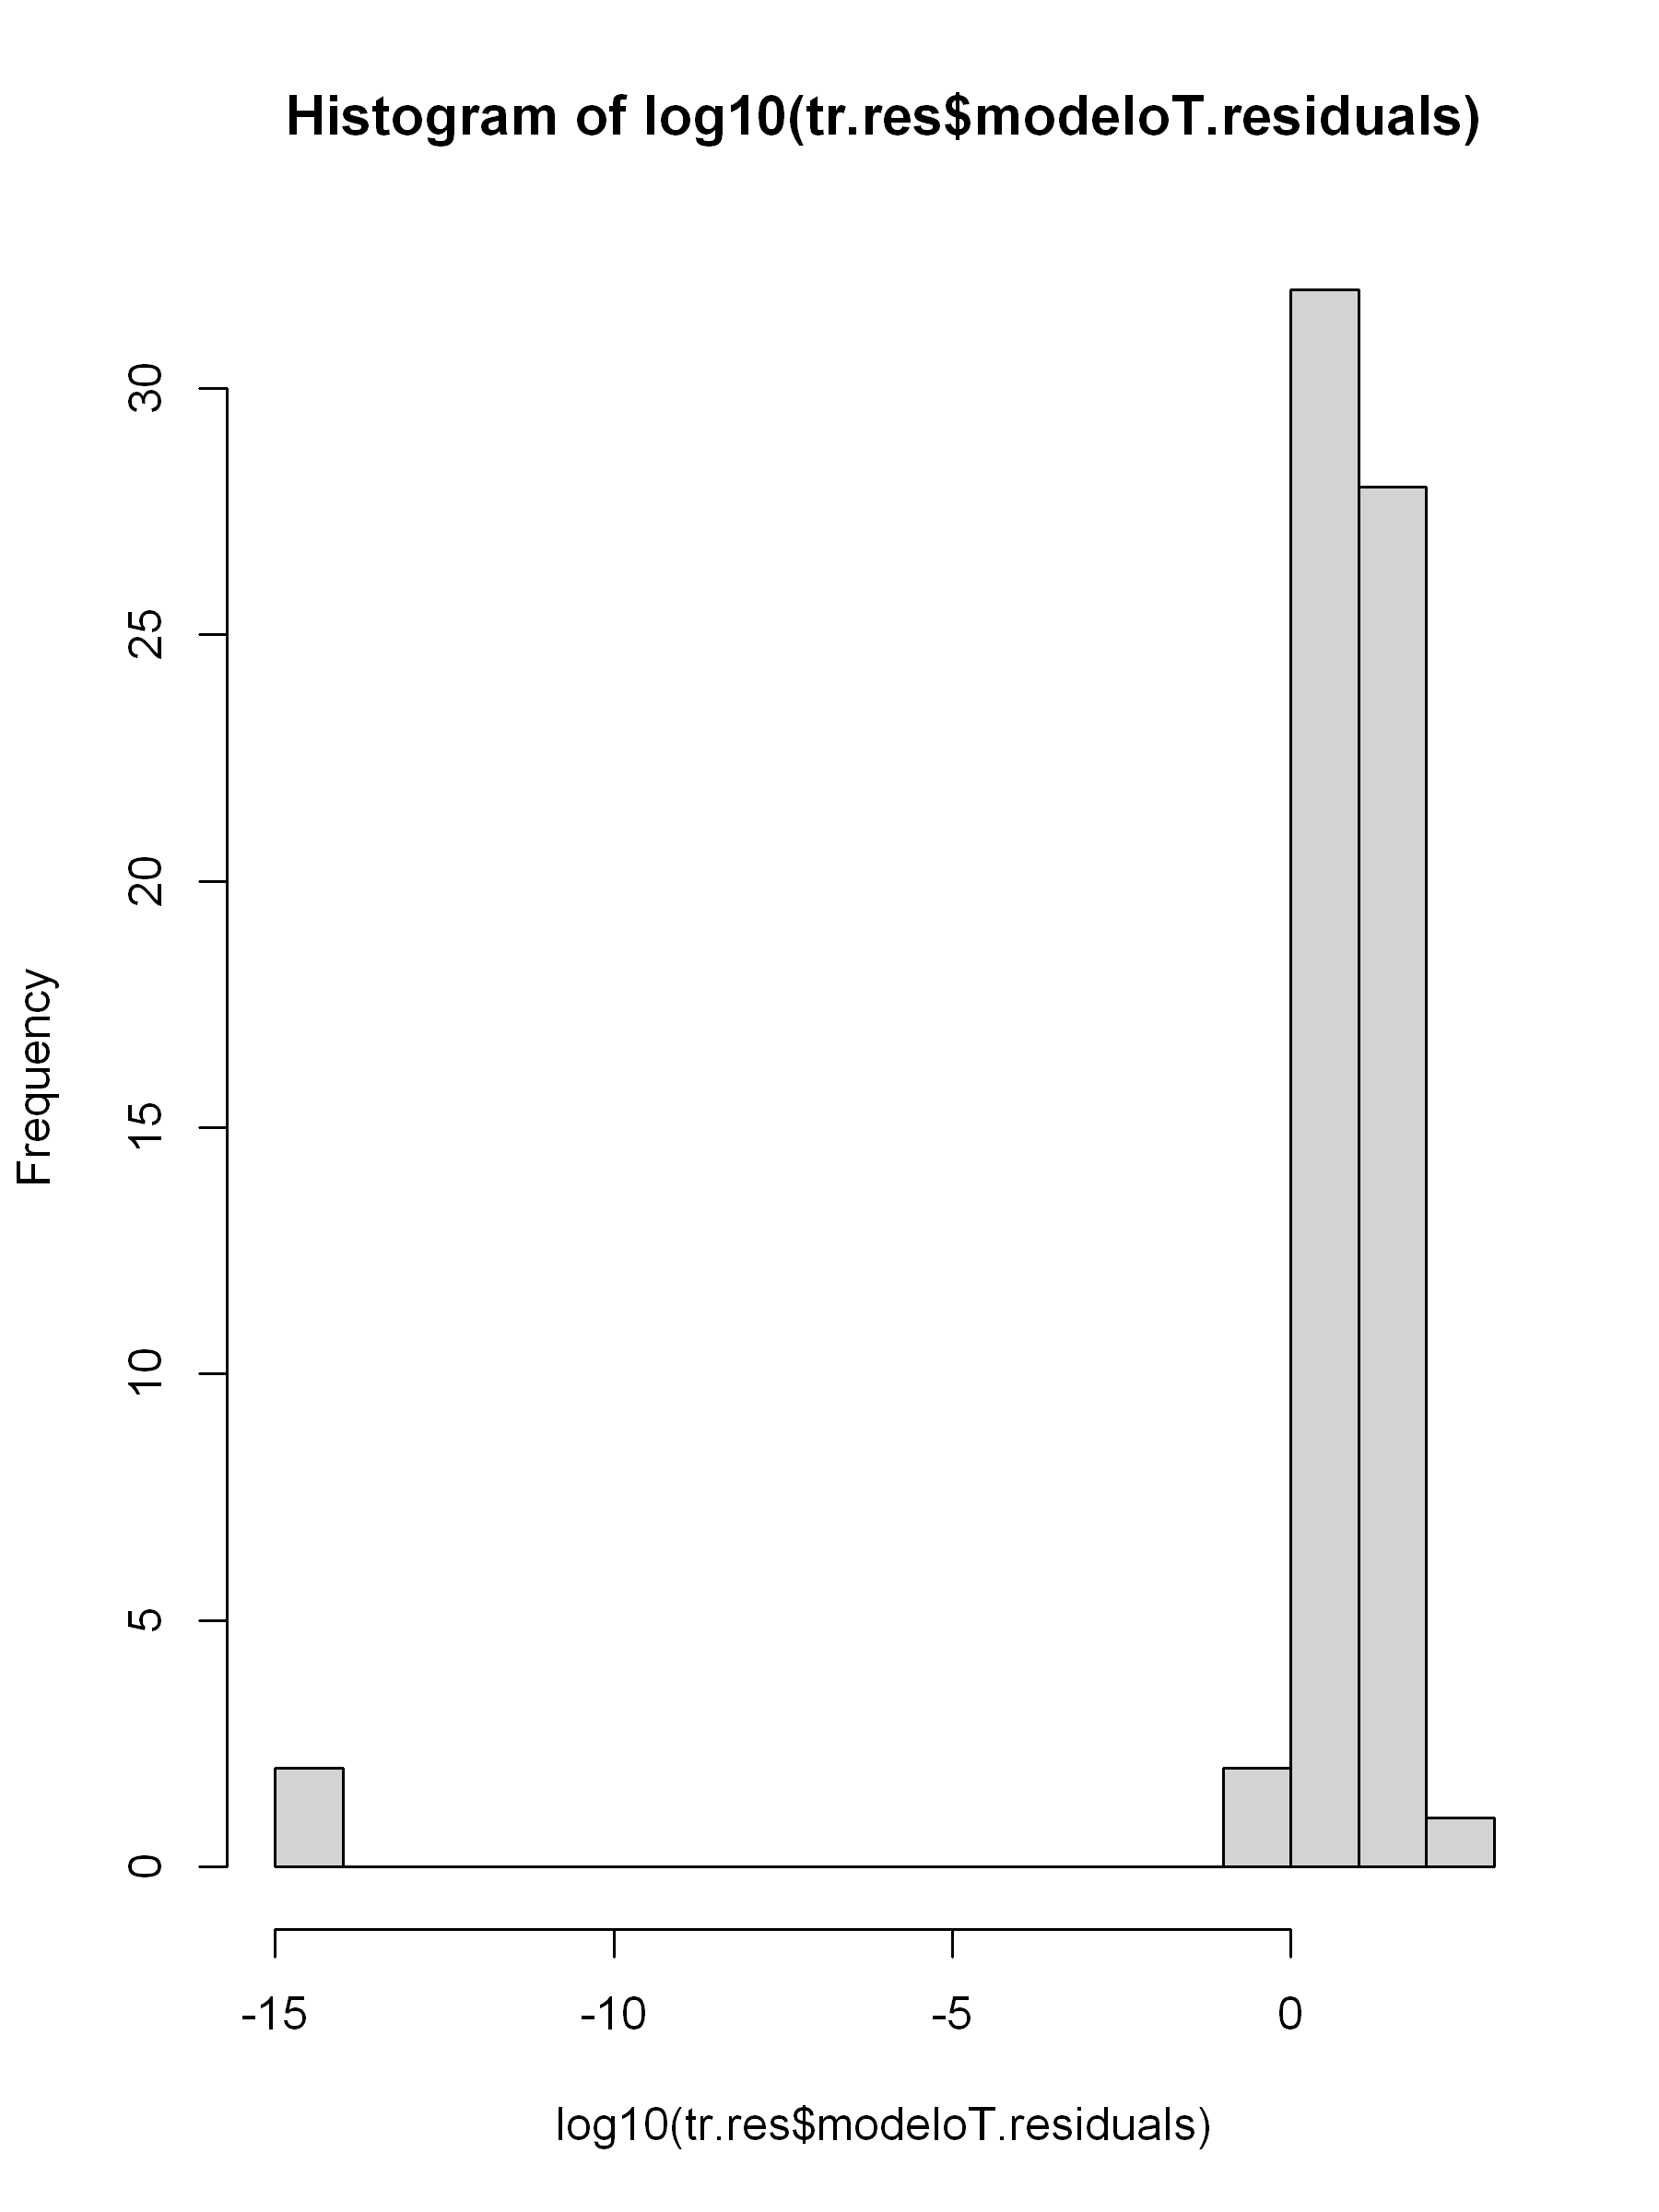

In [447]:
hist(log10(tr.res$modeloT.residuals), 15)

In [448]:
# Ahora vamos a entrenar al modelo con los datos de validacion

In [449]:
pred_v <- predict(modeloT, newdata = validation[,c(4,5,6,7,8,12,15,16)], na.action = na.pass) 

vl.res <- data.frame(validation$Square.Meters, pred_v, residuals = validation$Square.Meters - pred_v)
head(vl.res)



validation.Square.Meters pred_v   residuals
3  69.95596                 78.17706 -8.221101
6  60.01534                 55.77696  4.238373
9  69.95596                 53.87878 16.077177
11 74.97272                 58.61230 16.360419
15 40.04119                 25.93887 14.102323
16 44.96505                 35.39900  9.566055

In [450]:
## evaluate performance 
# training 
accuracy(pred_t, training$Square.Meters) 

# validation 
accuracy(pred_v, validation$Square.Meters)


ME            RMSE     MAE      MPE       MAPE    
Test set -1.641402e-14 23.31125 14.29645 -3.340459 19.59323

ME        RMSE     MAE      MPE       MAPE    
Test set -1.221947 21.47983 15.38295 -4.516095 26.93306

### Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

Warning message in hist(log10(vl.res$residuals), 20):
"NaNs produced"


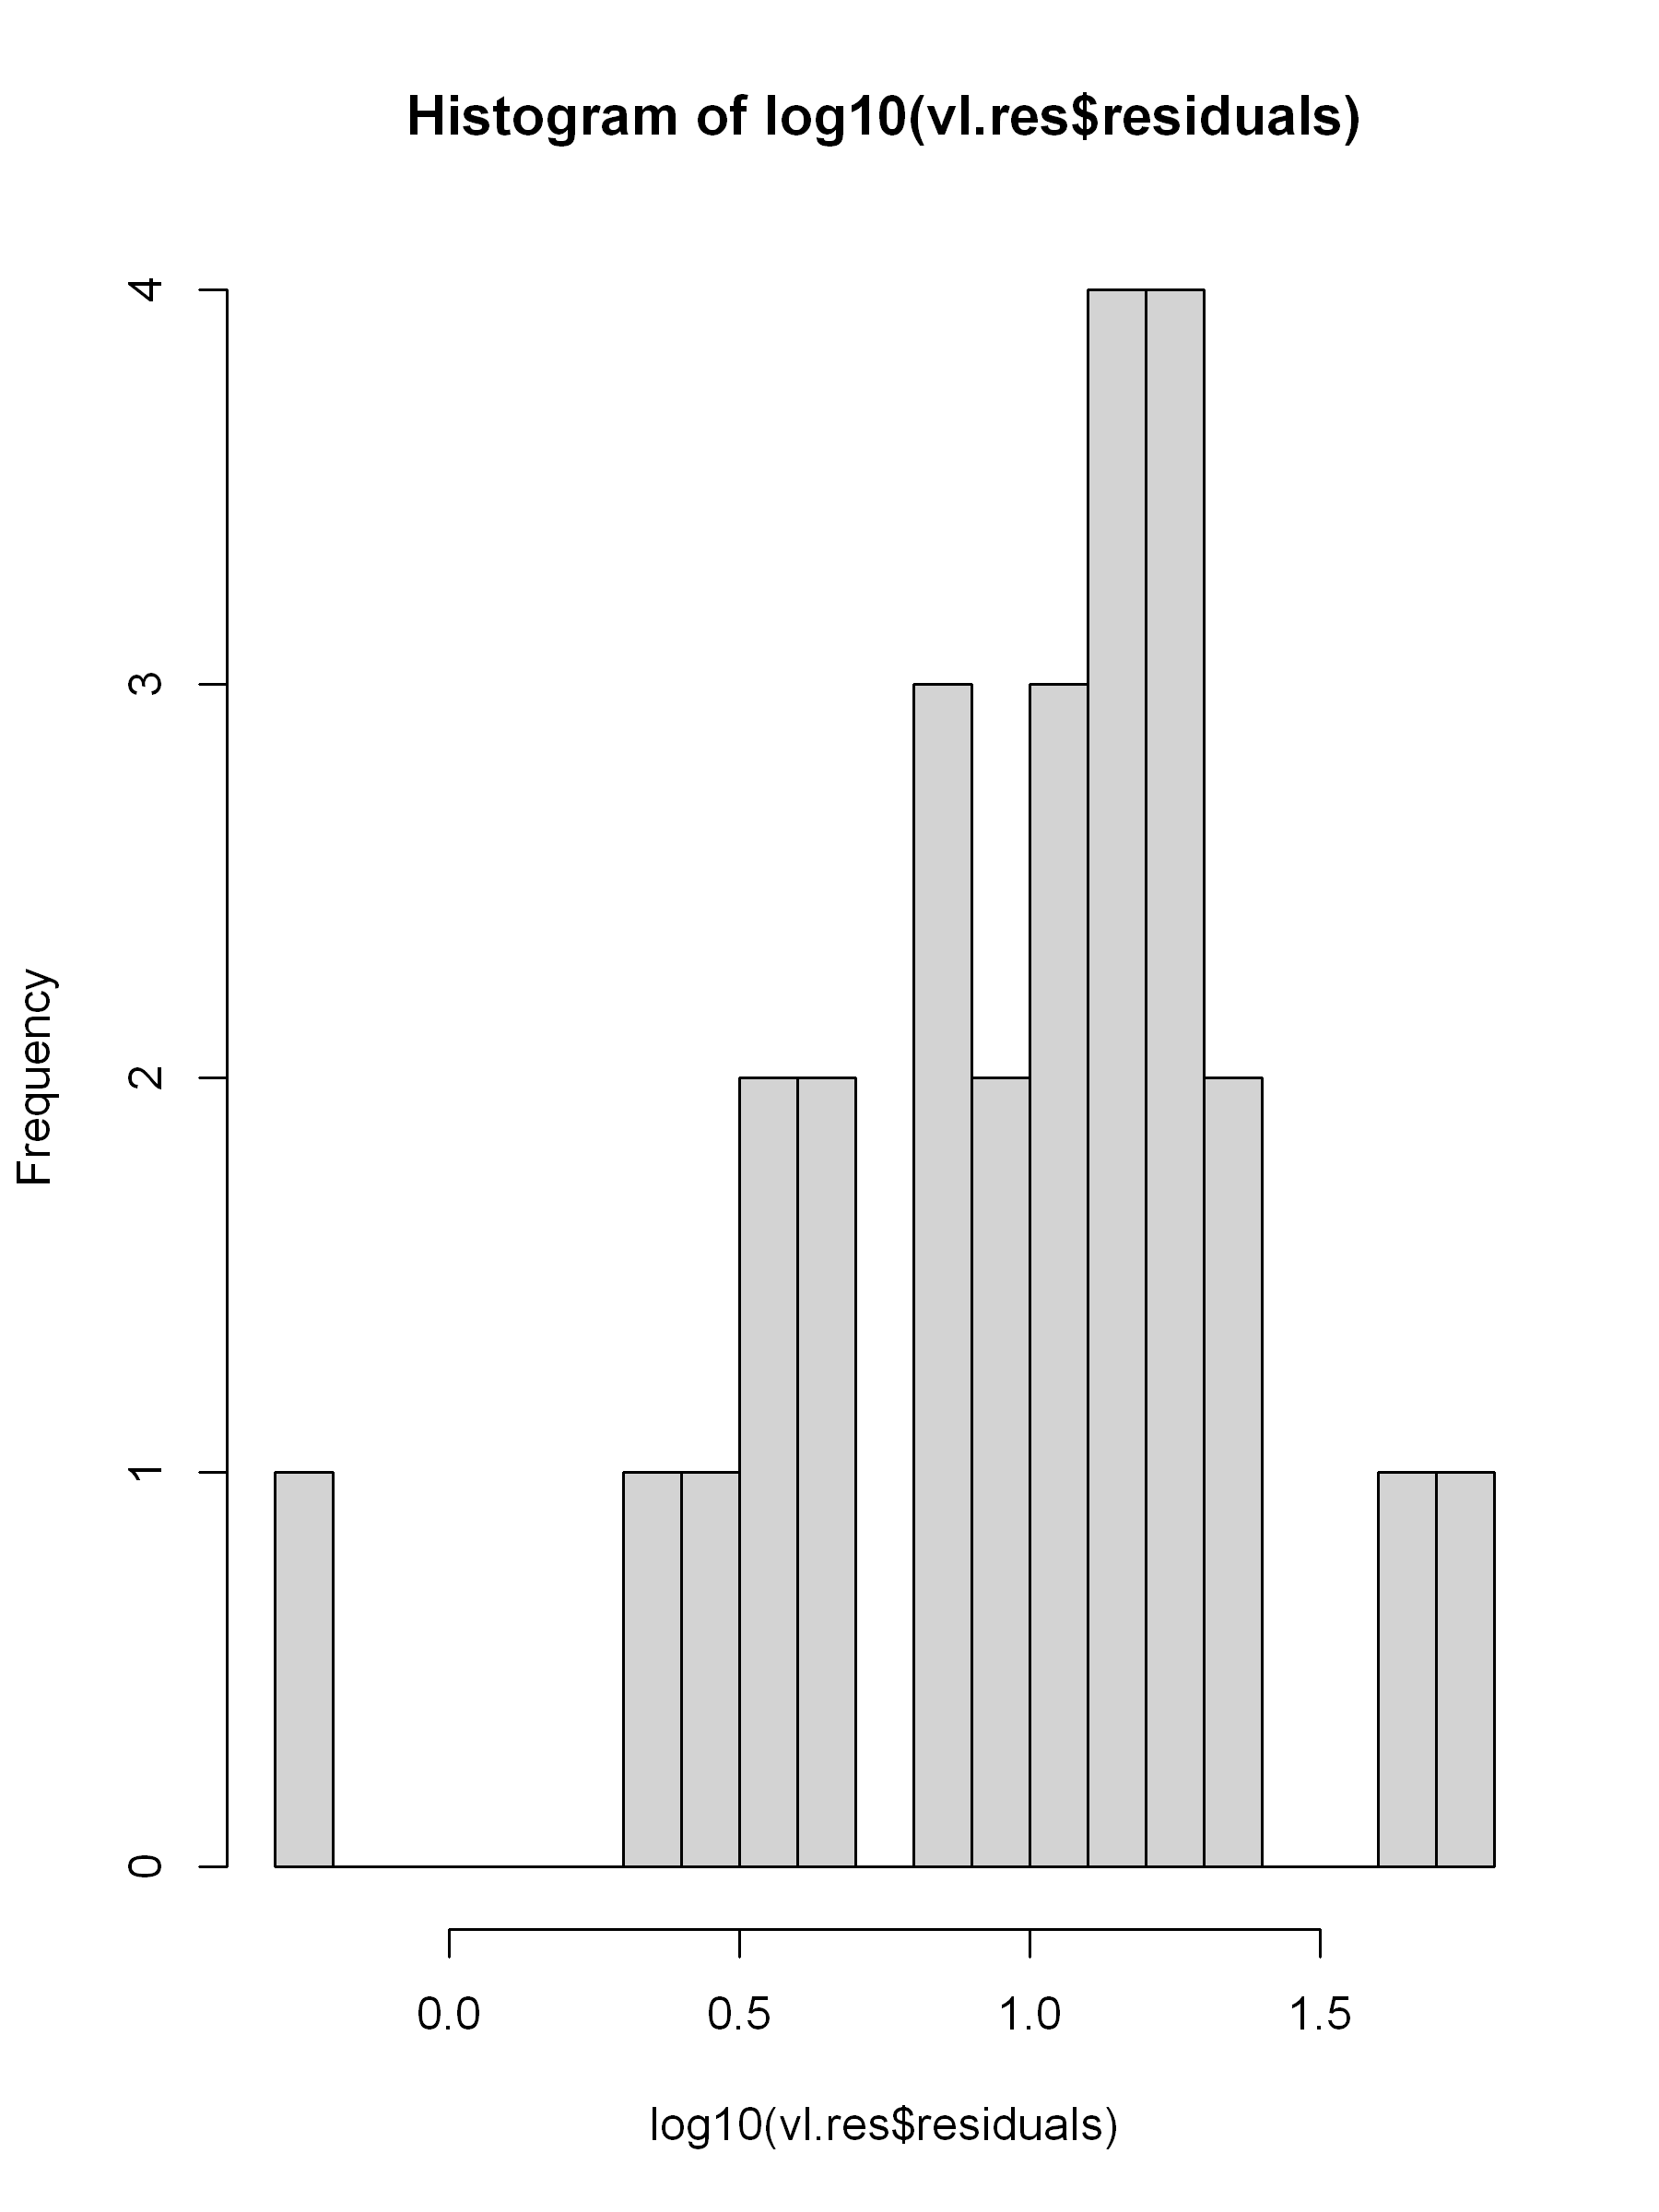

In [451]:
hist(log10(vl.res$residuals),20)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [452]:
labelsV <- c('Accommodates','Bathrooms','Price','Bedrooms','Neighbourhood','Beds','Review.Scores.Rating')
datosPredict <- data.frame(Accommodates=6, Bathrooms=1, Price=80, Bedrooms=3, neighb_id=factor(1), Beds=3, Review.Scores.Rating=80)
#datosPredict <- data.frame(Accommodates=2, Bathrooms=1, Price=40, Bedrooms=1, neighb_id=factor(1), Beds=3, Review.Scores.Rating=80)
head(datos)

Accommodates Bathrooms Price Bedrooms neighb_id Beds Review.Scores.Rating
1 6            1         80    1        1         3    80

In [453]:
predecirMetrosCuadrados <- predict(modeloT, newdata = datosPredict, na.action = na.pass) 
print(predecirMetrosCuadrados)

       1 
90.44854 


## Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [465]:
#summary(dfMadridBackup)

In [455]:
# Asignamos el Id del barrio conseguido en el Dendrogram alos barrios del dataframe
dfMadridNaN <- dfMadridBackup
dfMadridNaNSquareMeters <- subset(merge(dfMadridNaN, soloBarriosMadrid), select = -c(n))

In [467]:
#summary(dfMadridNaNSquareMeters)
head(dfMadridNaNSquareMeters,2)

Neighbourhood City   Room.Type       Accommodates Bathrooms Bedrooms Beds
1               Madrid Entire home/apt 2            1         1        2   
2               Madrid Entire home/apt 2            1         1        1   
  Price Square.Feet Guests.Included Extra.People Review.Scores.Rating Latitude
1 70    NA          1               0            NA                   40.41286
2 60    NA          1               0            98                   40.43294
  Longitude Square.Meters neighb_id
1 -3.703050 NA            1        
2 -3.678186 NA            1

In [472]:
dfNan <- dfMadridNaNSquareMeters %>%
    filter(is.na(Square.Meters))

dfNan$MetrosPredichos <- predict(modeloT, newdata = dfNan[,c(4,5,8,6,16,7,12)], na.action = na.pass) 
summary(dfNan)
head(dfNan)

 Neighbourhood          City            Room.Type          Accommodates   
 Length:7012        Length:7012        Length:7012        Min.   : 1.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 4.000  
                                                          Mean   : 4.025  
                                                          3rd Qu.: 5.000  
                                                          Max.   :16.000  
                                                                          
   Bathrooms        Bedrooms           Beds            Price       
 Min.   :0.000   Min.   : 0.000   Min.   : 1.000   Min.   : 12.00  
 1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 55.00  
 Median :1.000   Median : 1.000   Median : 2.000   Median : 74.00  
 Mean   :1.235   Mean   : 1.437   Mean   : 2.342   Mean   : 88.08  
 3rd Qu.:1.000   3rd Qu.: 2.000   3rd Qu.: 3.000   3rd Qu.:1

Neighbourhood City   Room.Type       Accommodates Bathrooms Bedrooms Beds
1               Madrid Entire home/apt 2            1.0       1        2   
2               Madrid Entire home/apt 2            1.0       1        1   
3               Madrid Entire home/apt 8            1.5       4        5   
4               Madrid Entire home/apt 3            1.0       1        2   
5               Madrid Entire home/apt 2            1.0       1        1   
6               Madrid Entire home/apt 8            2.5       4        6   
  Price Square.Feet Guests.Included Extra.People Review.Scores.Rating Latitude
1  70   NA          1                0            NA                  40.41286
2  60   NA          1                0            98                  40.43294
3 160   NA          4               15            98                  40.41056
4  59   NA          2                5           100                  40.47012
5  75   NA          1                0            98                  40.41514
6 180   NA          4               10            98                  40.42010
  Longitude Square.Meters neighb_id MetrosPredichos
1 -3.703050 NA            1                NA      
2 -3.678186 NA            1          50.01985      
3 -3.706429 NA            1         138.09442      
4 -3.686146 NA            1          55.81450      
5 -3.702980 NA            1          51.83131      
6 -3.711593 NA            1         157.53001

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [474]:
df_ApartaOri <- data.frame(Accommodates=6, Bathrooms=1, Bedrooms=3, Beds=3, Price=80, Guests.Included=2, Extra.People=1, Review.Scores.Rating=80, Latitude=40.42010 , Longitude=-3.711593 , Square.Meters=70)
df_ApartaOri

Accommodates Bathrooms Bedrooms Beds Price Guests.Included Extra.People
1 6            1         3        3    80    2               1           
  Review.Scores.Rating Latitude Longitude Square.Meters
1 80                   40.4201  -3.711593 70

In [514]:
library(textshape)
dfMadridPCA <- dfMadridConClusterId
#dfMadridPCA <- textshape::column_to_rownames(dfMadridPCA, loc = 1)

In [517]:
pcs <- prcomp(na.omit(dfMadridConClusterId[,-c(1,2,3,16)]), scale=TRUE) 
names(pcs)
# Vamos a ver cual es la que mas peso tiene en una matriz de correlacion
xx <- pcs$x
xx <- as.data.frame(xx)
dfMadridConClusterId$PC1 <- xx$PC1
dfMadridConClusterId$PC2 <- xx$PC2
dfMadridConClusterCor <- dfMadridConClusterId
head(dfMadridConClusterCor)
#cor(dfMadridConClusterCor)


[1] "sdev"     "rotation" "center"   "scale"    "x"

Neighbourhood City   Room.Type       Accommodates Bathrooms Bedrooms Beds
1               Madrid Entire home/apt 8            1         2        6   
2               Madrid Entire home/apt 2            1         1        1   
3               Madrid Entire home/apt 5            1         2        4   
4               Madrid Entire home/apt 4            1         0        3   
5               Madrid Entire home/apt 4            1         1        1   
6               Madrid Entire home/apt 4            1         1        1   
  Price Square.Feet Guests.Included Extra.People Review.Scores.Rating Latitude
1 95    1184        1                0           65                   40.42426
2 65     398        1                0           84                   40.44726
3 73     753        1                0           90                   40.42541
4 68     409        1                0           83                   40.41933
5 75     646        2               15           92                   40.41660
6 75     646        2               15           91                   40.41670
  Longitude Square.Meters neighb_id PC1        PC2        
1 -3.707008 109.99715     1         -1.4806641  0.48236547
2 -3.580723  36.97539     1          2.3298229  6.19228305
3 -3.711408  69.95596     1          0.2233902 -0.09228748
4 -3.706185  37.99733     1          2.0053078 -0.01501576
5 -3.703490  60.01534     1          1.0710924 -0.70916449
6 -3.703708  60.01534     1          1.0750146 -0.68784735

In [507]:
# Miro los diferentes valores generados por el PCA
#pcs$sdev
#length(pcs$sdev)
pcs$rotation
#dim(pcs$rotation)
#pcs$x
#dim(pcs$x)

PC1          PC2          PC3         PC4        
Accommodates         -0.375400150 -0.068110748  0.20205050 -0.03468799
Bathrooms            -0.342316568  0.190631959 -0.07508060 -0.16379917
Bedrooms             -0.363609120 -0.014924816 -0.03307310 -0.01887170
Beds                 -0.362607726 -0.087821666  0.15896208 -0.02419878
Price                -0.285381802 -0.011416714 -0.14172020 -0.17106401
Square.Feet          -0.376472438  0.055833829 -0.17630515 -0.04499997
Guests.Included      -0.287182404  0.004284613  0.21918625  0.04421250
Extra.People         -0.172153043 -0.302817352  0.23254628  0.80614004
Review.Scores.Rating -0.029192031 -0.156865581 -0.86117505  0.26306132
Latitude             -0.005294109  0.667522366  0.01809718  0.04173931
Longitude            -0.017371444  0.618716564 -0.02921886  0.46362919
Square.Meters        -0.376472438  0.055833829 -0.17630515 -0.04499997
                     PC5          PC6          PC7         PC8        
Accommodates          0.002560148 -0.034785667  0.22417193 -0.30494419
Bathrooms             0.106408340  0.008387653  0.11522725  0.45587858
Bedrooms             -0.131257375 -0.280964503  0.09217991 -0.19564034
Beds                 -0.115771992 -0.147364903  0.08620454 -0.54044833
Price                -0.258940705  0.510048135 -0.71561148 -0.13831369
Square.Feet           0.384012205 -0.073872136 -0.06599172  0.15794149
Guests.Included      -0.665708779  0.095911989  0.23776100  0.47616454
Extra.People          0.220695874  0.300333166 -0.03742529  0.08191001
Review.Scores.Rating -0.240903733  0.053840381  0.27011586 -0.10619495
Latitude              0.104688380  0.561692494  0.37703937 -0.23337735
Longitude            -0.187587071 -0.457386586 -0.35592056 -0.02486463
Square.Meters         0.384012205 -0.073872136 -0.06599172  0.15794149
                     PC9         PC10        PC11         PC12         
Accommodates         -0.25062623  0.16461143  0.760287412 -1.269420e-16
Bathrooms            -0.72550129 -0.11489444 -0.204848786 -7.237620e-17
Bedrooms              0.18952291 -0.82753768 -0.049359099  9.698336e-18
Beds                 -0.09942804  0.37343961 -0.592427384  2.904195e-17
Price                -0.05574629 -0.06043599  0.062364722 -1.801830e-17
Square.Feet           0.33393575  0.16749600  0.015865018 -7.071068e-01
Guests.Included       0.31751676  0.17621095 -0.003620878 -7.064905e-17
Extra.People         -0.08108567 -0.12083049 -0.080832938  4.464720e-17
Review.Scores.Rating -0.08424891  0.09724337  0.044607252 -1.168769e-18
Latitude              0.13312040 -0.08731904 -0.062359784  1.325807e-19
Longitude            -0.08176182  0.11372366  0.098869207  2.146953e-17
Square.Meters         0.33393575  0.16749600  0.015865018  7.071068e-01

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?